# What 300,000 Kickstarter Campaigns Tell Us About Crowdfunding

# Background:

* Kickstarter is a crowdfunding website that raises money for all kinds of campaigns. During a set period of time, backers contribute to the campaigns of their choice. The all-or-nothing rule adds to the uncertainty of the outcomes-- you either get all the money, or you get nothing if the goal is not reached before the deadline you have set.
* Why do some kickstarter campaigns succede whereas others don't? What factors play important roles in the funds that kickstarter campaigns raise? More than 300,000+ kickstarter campaigns were examined, for a closer look at the relationships between different parameters and the outcomes.
* If a kickstarter campaign is planned to launch, which month of the year/ day of the week/ time in the day would be a good choice? How long should the campaign last for? How many would be good for the limit of backers? Which category and sub-category are most popular, and which should it be listed under after the product is decided? What would be a reasonable goal for the fund-raising? These are all the questions that an careful analysis of the dataset can lead to better answers to.
* Although the pledged amount of many failed campaigns were not zero dollars in this dataset, however, starters of the campaigns did not receive any in the end if their campaigns were not successful. Thus only the pledged amount of successful campaigns were meaningful than that of other campaigns -- they were substantial amount of dollars that arrived in fundraisers' bank accounts, instead of just numbers.
* Since the all or nothing scenario is an important feature of kickstarter 
campaigns, more emphasis would be focused on relationships between other parameters and different outcomes (e.g., successful), although some analysis were also performed upon that between other parameters and the amount of raised funds.

# Resources:

* The data was downloaded as a csv file from the kaggle dataset: "Kickstarter projects".
* Every campaign had a unique ID to it.
* Campaigns ended in as early as May 2009, and as late as March, 2013.
* The csv file contains data of 378,661 campaigns, among which 292,627 campaigns were created in the U.S.
* Live campaigns were around Janurary 2017, implicating the data collection was around silimar time.

# Note:

* Only U.S. campaigns were researched in this project.
* Without specification, the units of pledged and goals are in US dollars.
* Pledged amount and goal amount were both turned into log numbers in the following plots.
* Unless otherwise specified, all the date related variables plotted were related to the end dates of campaigns, given that last-minutes contributions were often made by consumers. The time related to campaigns were their launch time.

In [65]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import style
import matplotlib.ticker as mtick
from pylab import rcParams
import seaborn as sns; sns.set(style="white", color_codes=True)
from datetime import date
import numpy as np
import pylab as pl

In [66]:
colors = ["#adc2eb", "#3366cc", "#1f3d7a", "#000000", "#7094db"]
single_color = "#adc2eb"
figsize = (9, 6)
big_figsize = (15, 8)
fontsize = 12
markersize = 5
edgecolor = "black"
linewidth = 0.5
bbox_to_anchor = (0.45,-0.17)
ncol = 5
#style.use('fivethirtyeight')
matplotlib.rcParams.update({'font.size': fontsize})

In [67]:
df = pd.read_csv("raw_data.csv")
#df = df.sample(100)

In [68]:
df = df.sort_values(by=["deadline"], ascending=True).reset_index(drop=True)
del(df["usd pledged"], df["pledged"], df["goal"], df["currency"])
df = df[df["country"]=="US"]

In [69]:
df = df.rename(columns={"category":"sub_category", "usd_pledged_real":"pledged", "usd_goal_real":"goal", "deadline":"end", "state":"outcome", "launched":"launch"})
df = df.fillna(value=0)

In [70]:
df["launch_full_date"] = pd.to_datetime(df["launch"])
df["end_full_date"] = pd.to_datetime(df["end"])
df["duration"] = [int(i.days) for i in (df["end_full_date"] - df["launch_full_date"])]

df["launch_year"] = pd.DatetimeIndex(df["launch"]).year
df["launch_month"] = pd.DatetimeIndex(df["launch"]).month
df["launch_date"] = pd.DatetimeIndex(df["launch"]).day
df["launch_day"] = pd.DatetimeIndex(df["launch"]).dayofweek

df["launch_time"] = df["launch"].str.split(" ", expand=True)[1].str.split(":", expand=True)[0]

df["end_year"] = pd.DatetimeIndex(df["end"]).year
df["end_month"] = pd.DatetimeIndex(df["end"]).month
df["end_date"] = pd.DatetimeIndex(df["end"]).day
df["end_day"] = pd.DatetimeIndex(df["end"]).dayofweek

del(df["launch"], df["ID"], df["country"], df["launch_full_date"], df["end_full_date"])

columns = ["name", "sub_category", "main_category", "outcome", "backers",
       "country", "pledged", "goal", "launch_full_date", "end_full_date",
       "duration", "launch_year", "launch_month", "launch_date", "launch_day",
       "launch_time", "end_year", "end_month", "end_date", "end_day"]

df["pledged_to_goal"] = df["pledged"] / df["goal"] * 100
df["pledged_to_goal"] = df["pledged_to_goal"].astype(int)

for i in ["backers", "pledged", "goal"]:
    df[i] = pd.to_numeric(df[i])

for i in ["launch_year", "launch_month", "launch_date", "launch_day",
          "launch_time", "end_year", "end_month", "end_date", "end_day"]:
     df[i] = df[i].astype("int")

In [71]:
quarter_list = []
for month in df["end_month"].tolist():
    if month in [1,2,3]:
        quarter_list.append("Q1")
    elif month in [4,5,6]:
        quarter_list.append("Q2")
    elif month in [7,8,9]:
        quarter_list.append("Q3")
    elif month in [10,11,12]:
        quarter_list.append("Q4")
df["end_quarter"] = quarter_list

In [72]:
launch_time = df["launch_time"].values
am_pm = []
for i in range(len(launch_time)):
    if(launch_time[i]<12):
        am_pm.append("am")
    else:
        am_pm.append("pm")
df["am_pm"] = am_pm
df.head()

,name,sub_category,main_category,end,outcome,backers,pledged,goal,duration,launch_year,...,launch_date,launch_day,launch_time,end_year,end_month,end_date,end_day,pledged_to_goal,end_quarter,am_pm
0,drawing for dollars,Illustration,Art,2009-05-03,successful,3,35.0,20.0,8,2009,...,24,4,21,2009,5,3,6,175,Q2,pm
1,New York Makes a Book!!,Journalism,Journalism,2009-05-16,successful,110,3329.0,3000.0,17,2009,...,28,1,13,2009,5,16,5,110,Q2,pm
2,Sponsor Dereck Blackburn (Lostwars) Artist in ...,Rock,Music,2009-05-16,failed,2,15.0,300.0,16,2009,...,29,2,5,2009,5,16,5,5,Q2,am
3,"""All We Had"" Gets Into Cannes -- $10 or More G...",Documentary,Film & Video,2009-05-20,failed,4,40.0,300.0,19,2009,...,30,3,22,2009,5,20,2,13,Q2,pm
4,Mr. Squiggles,Illustration,Art,2009-05-22,failed,0,0.0,30.0,9,2009,...,12,1,23,2009,5,22,4,0,Q2,pm


# General Stats

* Funds raised of campaigns:
* A campaign named "Pebble Time - Awesome Smartwatch, No Compromises", which ended in March 2015, raised the most funds($20,338,986).
* Top 3 campaigns were all in the "Product Design" sub-category under the "Design" category.

* Backers for campaigns:
* A tabletop game named "Exploding Kittens" had the greatest number of backers(219,382). The difference of backer quantities was drastic among campaigns.

In [73]:
describe_df = df.describe()
describe_df

,backers,pledged,goal,duration,launch_year,launch_month,launch_date,launch_day,launch_time,end_year,end_month,end_date,end_day,pledged_to_goal
count,292627.000000,2.926270e+05,2.926270e+05,292627.000000,292627.000000,292627.000000,292627.000000,292627.000000,292627.000000,292627.000000,292627.000000,292627.000000,292627.000000,2.926270e+05
mean,113.078615,9.670193e+03,4.403497e+04,33.740954,2013.935372,6.408284,15.259665,2.426745,12.928612,2014.006947,6.693801,15.178049,3.176433,3.769142e+02
std,985.723400,9.932942e+04,1.108372e+06,68.025055,1.983963,3.311575,8.795847,1.759184,7.921125,1.971462,3.313367,9.029737,1.953617,3.013830e+04
min,0.000000,0.000000e+00,1.000000e-02,0.000000,1970.000000,1.000000,1.000000,0.000000,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000e+00
25%,2.000000,4.100000e+01,2.000000e+03,29.000000,2012.000000,4.000000,8.000000,1.000000,5.000000,2012.000000,4.000000,7.000000,2.000000,0.000000e+00
50%,14.000000,7.250000e+02,5.250000e+03,29.000000,2014.000000,6.000000,15.000000,2.000000,16.000000,2014.000000,7.000000,15.000000,3.000000,1.500000e+01
75%,60.000000,4.370000e+03,1.500000e+04,37.000000,2015.000000,9.000000,23.000000,4.000000,20.000000,2016.000000,9.000000,23.000000,5.000000,1.070000e+02
max,219382.000000,2.033899e+07,1.000000e+08,14866.000000,2018.000000,12.000000,31.000000,6.000000,23.000000,2018.000000,12.000000,31.000000,6.000000,1.042779e+07


* The differences were all above 10,000 times between the max and median of backers, pledged and goal amount, showing a huge gap between the top campaigns and the rest participants.
* Among 292,627 campaigns in the U.S., the greatest funds pledged for a campaign was 207 times of the mean, and the most backers for a campaign was 1941 times of the mean. Thus median was a better statistic parameter to look at than the mean in terms of understanding the dataset as a whole.
* The average pledged amount (9,670 dollars) was 13.3 times of the median of pledged amount(725 dollars), and the median of pledged to goal ratio was around 15.78%. 
* 75% of all campaigns had less than 2 backers and a goal of more than 2,000 dollars.
* The average duration is around 34 days.
* The average goal is more than 4 times of that of pledged amount.

In [74]:
describe_successful = df[df["outcome"]=="successful"].describe()
describe_successful

,backers,pledged,goal,duration,launch_year,launch_month,launch_date,launch_day,launch_time,end_year,end_month,end_date,end_day,pledged_to_goal
count,109299.000000,1.092990e+05,1.092990e+05,109299.000000,109299.000000,109299.000000,109299.000000,109299.000000,109299.000000,109299.000000,109299.000000,109299.000000,109299.000000,1.092990e+05
mean,270.177952,2.321289e+04,9.695671e+03,31.392108,2013.694563,6.339555,15.082782,2.372593,13.057832,2013.752157,6.717921,14.953010,3.127787,9.622973e+02
std,1593.147678,1.607100e+05,2.879007e+04,12.033229,2.028745,3.298402,8.822346,1.744180,7.704682,2.012625,3.292765,9.026611,1.946169,4.911284e+04
min,1.000000,1.000000e+00,1.000000e-02,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,2009.000000,1.000000,1.000000,0.000000,8.500000e+01
25%,34.000000,2.060065e+03,1.500000e+03,29.000000,2012.000000,3.000000,7.000000,1.000000,5.000000,2012.000000,4.000000,7.000000,2.000000,1.040000e+02
50%,71.000000,5.185000e+03,4.000000e+03,29.000000,2014.000000,6.000000,15.000000,2.000000,16.000000,2014.000000,7.000000,15.000000,3.000000,1.150000e+02
75%,167.000000,1.320201e+04,1.000000e+04,34.000000,2015.000000,9.000000,22.000000,4.000000,20.000000,2015.000000,10.000000,23.000000,5.000000,1.580000e+02
max,219382.000000,2.033899e+07,2.000000e+06,91.000000,2017.000000,12.000000,31.000000,6.000000,23.000000,2018.000000,12.000000,31.000000,6.000000,1.042779e+07


In [75]:
describe_failed = df[df["outcome"]=="failed"].describe()
describe_failed

,backers,pledged,goal,duration,launch_year,launch_month,launch_date,launch_day,launch_time,end_year,end_month,end_date,end_day,pledged_to_goal
count,152061.000000,152061.000000,1.520610e+05,152061.000000,152061.000000,152061.000000,152061.000000,152061.000000,152061.000000,152061.000000,152061.000000,152061.000000,152061.00000,152061.000000
mean,16.772118,1331.173917,6.066424e+04,34.477164,2014.011153,6.397590,15.362940,2.465557,12.832173,2014.080908,6.727662,15.318563,3.21761,8.937630
std,73.425843,6999.568474,1.356864e+06,13.513946,1.909592,3.291926,8.778117,1.765711,8.075102,1.898457,3.295430,9.030117,1.95823,15.090471
min,0.000000,0.000000,1.500000e-01,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,2009.000000,1.000000,1.000000,0.00000,0.000000
25%,1.000000,5.000000,2.600000e+03,29.000000,2013.000000,4.000000,8.000000,1.000000,4.000000,2013.000000,4.000000,7.000000,2.00000,0.000000
50%,3.000000,106.000000,7.500000e+03,29.000000,2014.000000,6.000000,15.000000,2.000000,16.000000,2014.000000,7.000000,15.000000,3.00000,1.000000
75%,13.000000,700.000000,2.000000e+04,39.000000,2015.000000,9.000000,23.000000,4.000000,20.000000,2015.000000,9.000000,23.000000,5.00000,11.000000
max,6550.000000,757352.940000,1.000000e+08,91.000000,2017.000000,12.000000,31.000000,6.000000,23.000000,2018.000000,12.000000,31.000000,6.00000,107.000000


# Number Of Campaigns vs. Outcomes

In [76]:
data = pd.DataFrame(df["outcome"].value_counts())
data["percentage"] = data["outcome"] / data["outcome"].sum() * 100
data.head()

,outcome,percentage
failed,152061,51.964104
successful,109299,37.350962
canceled,28311,9.674774
live,1740,0.594614
suspended,1216,0.415546


(0, 160000)

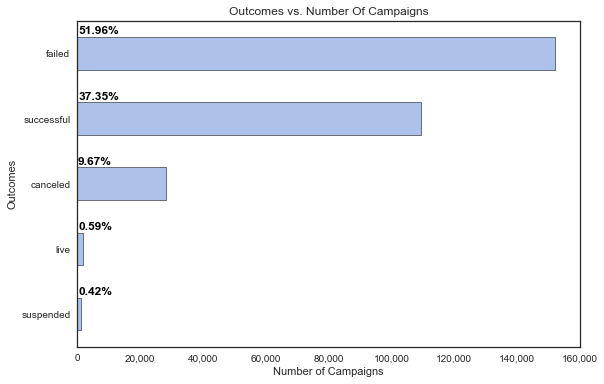

In [77]:
data.plot(kind="barh", y="outcome", color=single_color, edgecolor=edgecolor, linewidth=linewidth, legend=None, figsize=figsize)
plt.title("Outcomes vs. Number Of Campaigns")
plt.xlabel("Number of Campaigns")
plt.ylabel("Outcomes")
plt.xlim(0, 170000)
plt.gca().invert_yaxis()
frameon = True
ax = plt.gca()
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
for i, v in enumerate(data["percentage"]):
    ax.text(v+200, i-0.3, "%.2f" % v + "%", color="black", fontweight="bold")
plt.xlim(0, 160000)

* Successful campaigns made up only 37.35% of all campaigns, much less than that of failed ones (51.96%).
* Live and suspended campaigns only constituted approximately 1% of all campaigns, at the time of data collection.
* 9.67% of all campaigns were canceled before the campaign ended.

# Median Of Pledged, goal, pledged over goal, and backers vs. Outcomes

In [79]:
outcome_df = df.groupby("outcome").median()
outcome_df.head()

,backers,pledged,goal,duration,launch_year,launch_month,launch_date,launch_day,launch_time,end_year,end_month,end_date,end_day,pledged_to_goal
outcome,,,,,,,,,,,,,,
canceled,3.0,100.0,10000.0,29.0,2015.0,7.0,15.0,2.0,16.0,2015.0,7.0,15.0,3.0,1.0
failed,3.0,106.0,7500.0,29.0,2014.0,6.0,15.0,2.0,16.0,2014.0,7.0,15.0,3.0,1.0
live,4.0,220.0,6500.0,31.0,2017.0,12.0,15.0,2.0,16.0,2018.0,1.0,13.0,3.0,4.0
successful,71.0,5185.0,4000.0,29.0,2014.0,6.0,15.0,2.0,16.0,2014.0,7.0,15.0,3.0,115.0
suspended,2.0,30.5,5000.0,29.0,2015.0,6.0,15.5,2.0,16.0,2015.0,6.0,16.0,3.0,1.0


In [80]:
index_list = ["successful", "canceled", "live", "suspended", "failed"]
columns = ["pledged", "goal", "pledged_to_goal", "backers"]
data = pd.DataFrame(index=index_list, columns=columns)
for i in index_list:
    for j in columns:
        data.loc[i,j] = outcome_df.loc[i,j]
data

,pledged,goal,pledged_to_goal,backers
successful,5185,4000,115,71
canceled,100,10000,1,3
live,220,6500,4,4
suspended,30.5,5000,1,2
failed,106,7500,1,3


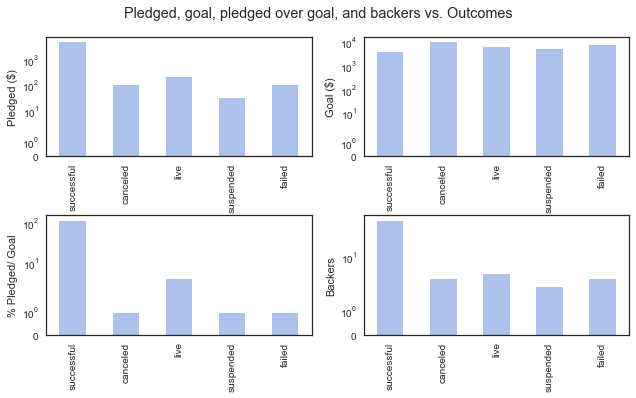

In [81]:
fig = plt.figure(figsize=figsize)
st = plt.suptitle("Pledged, goal, pledged over goal, and backers vs. Outcomes")

plt.subplot(221)
data["pledged"].plot(kind="bar", color=single_color)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set_ylabel("Pledged ($)")
ax.set_yscale('symlog')

plt.subplot(222)
data["goal"].plot(kind="bar", color=single_color)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set_ylabel("Goal ($)")
ax.set_yscale('symlog')

plt.subplot(223)
data["pledged_to_goal"].plot(kind="bar", color=single_color)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set_ylabel("% Pledged/ Goal")
ax.set_yscale('symlog')

plt.subplot(224)
data["backers"].plot(kind="bar", color=single_color)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set_ylabel("Backers")
ax.set_yscale('symlog')

plt.tight_layout()

# Shift subplots down
st.set_y(0.92)
fig.subplots_adjust(top=0.85)

fig.savefig("test.png")

# Pledged Amount vs. Above X Percent Of Population

In [82]:
df_successful = df[df["outcome"]=="successful"]
data_in_successful = df_successful["pledged"].tolist()
data_in_successful.sort()

percent_in_successful = []
for i in range(len(data_in_successful)):
    percent_in_successful.append(i / len(data_in_successful) * 100)
    
data_in_successful[0]
percent_in_successful[0]

0.0

In [18]:
percent_in_all = []
data_in_all = df["pledged"].tolist()
data_in_all.sort()
for i in range(len(data_in_all)):
    percent_in_all.append(i / len(data_in_all) * 100)

data_in_all[0]
percent_in_all[0]

0.0

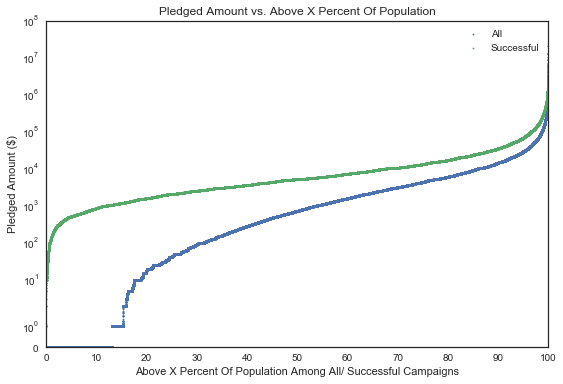

In [19]:
plt.figure(figsize=figsize)
plt.scatter(y=data_in_all, x=percent_in_all, s=2)
plt.scatter(y=data_in_successful, x=percent_in_successful, s=2)

ax = plt.gca()
ax.set_yscale('symlog')

plt.title("Pledged Amount vs. Above X Percent Of Population")
plt.xlabel("Above X Percent Of Population Among All/ Successful Campaigns")
plt.ylabel("Pledged Amount ($)")
plt.legend(["All", "Successful"])
ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.xlim(0, 100)
plt.ylim(0, 100_000_000)

plt.show()

# Pledged Amount vs. Above X Percent Of Population, Under Each Category

In [20]:
main_category_list = df["main_category"].unique()
main_category_list

array(['Art', 'Journalism', 'Music', 'Film & Video', 'Fashion',
       'Publishing', 'Food', 'Theater', 'Technology', 'Photography',
       'Design', 'Comics', 'Games', 'Crafts', 'Dance'], dtype=object)

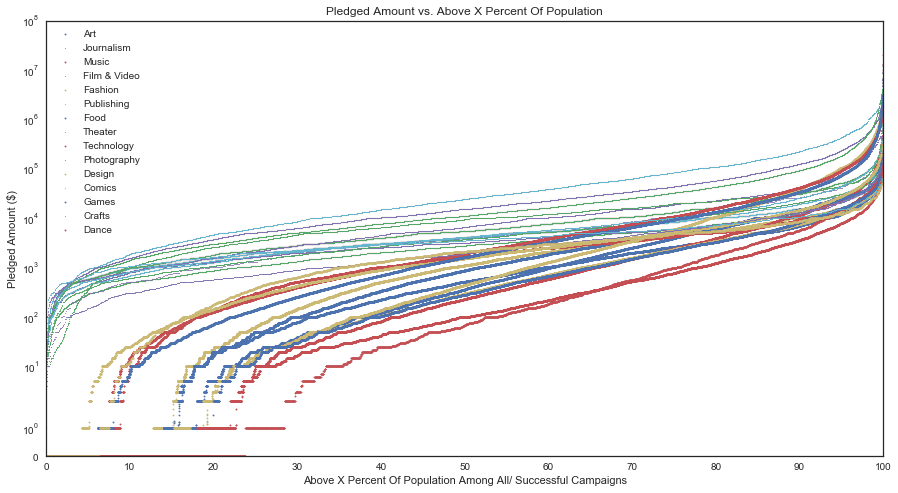

In [21]:
plt.figure(figsize=(15, 8))
    
legend_list = []
for i in range(len(main_category_list)):
    main_category = main_category_list[i]
    df_i = df[df["main_category"]==main_category]

    df_successful = df_i[df_i["outcome"]=="successful"]
    data_in_successful = df_successful["pledged"].tolist()
    data_in_successful.sort()

    percent_in_successful = []
    for i in range(len(data_in_successful)):
        percent_in_successful.append(i / len(data_in_successful) * 100)

    percent_in_all = []
    data_in_all = df_i["pledged"].tolist()
    data_in_all.sort()
    for i in range(len(data_in_all)):
        percent_in_all.append(i / len(data_in_all) * 100)

    plt.scatter(y=data_in_all, x=percent_in_all, s=2)
    plt.scatter(y=data_in_successful, x=percent_in_successful, s=0.5)
    
    legend_list.append(main_category)
    plt.legend(legend_list)

ax = plt.gca()
ax.set_yscale('symlog')

plt.title("Pledged Amount vs. Above X Percent Of Population")
plt.xlabel("Above X Percent Of Population Among All/ Successful Campaigns")
plt.ylabel("Pledged Amount ($)")
ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.xlim(0, 100)
plt.ylim(0, 100_000_000)

plt.show()

# Number Of Campaigns vs. Pledged Amount Range

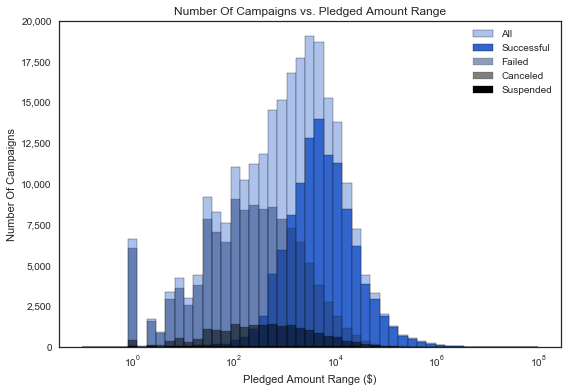

In [22]:
plt.figure(figsize=figsize)

data_all = df["pledged"].tolist()
pl.hist(data_all, bins=np.logspace(np.log10(0.1),np.log10(100_000_000), 50),\
        color=single_color, edgecolor=edgecolor)

data_successful = df[df["outcome"]=="successful"]["pledged"].tolist()
pl.hist(data_successful, bins=np.logspace(np.log10(0.1),np.log10(100_000_000), 50),\
        color=colors[1], edgecolor=edgecolor)

data_failed = df[df["outcome"]=="failed"]["pledged"].tolist()
pl.hist(data_failed, bins=np.logspace(np.log10(0.1),np.log10(100_000_000), 50),\
        color=colors[2], alpha=0.5, edgecolor=edgecolor)

data_canceled = df[df["outcome"]=="canceled"]["pledged"].tolist()
pl.hist(data_canceled, bins=np.logspace(np.log10(0.1),np.log10(100_000_000), 50),\
        color=colors[3], alpha=0.5, edgecolor=edgecolor)

data_suspended = df[df["outcome"]=="suspended"]["pledged"].tolist()
pl.hist(data_suspended, bins=np.logspace(np.log10(0.1),np.log10(100_000_000), 50),\
        color=colors[3], edgecolor=edgecolor)

plt.legend(["All", "Successful", "Failed", "Canceled", "Suspended"])

pl.gca().set_xscale("log")

ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.title("Number Of Campaigns vs. Pledged Amount Range")
plt.xlabel("Pledged Amount Range ($)")
plt.ylabel("Number Of Campaigns")

pl.show()

# Number Of Campaigns vs. Goal Amount Range

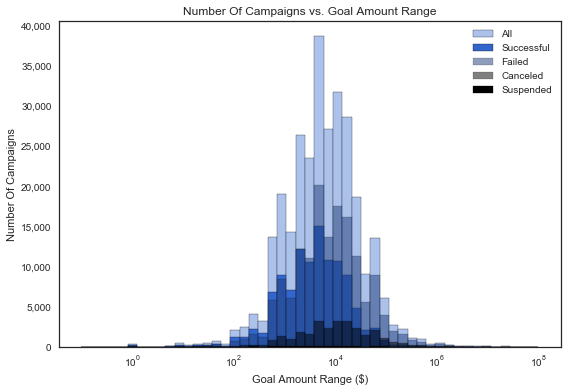

In [23]:
plt.figure(figsize=figsize)

data_all = df["goal"].tolist()
pl.hist(data_all, bins=np.logspace(np.log10(0.1),np.log10(100_000_000), 50),\
        color=single_color, edgecolor=edgecolor)

data_successful = df[df["outcome"]=="successful"]["goal"].tolist()
pl.hist(data_successful, bins=np.logspace(np.log10(0.1),np.log10(100_000_000), 50),\
        color=colors[1], edgecolor=edgecolor)

data_failed = df[df["outcome"]=="failed"]["goal"].tolist()
pl.hist(data_failed, bins=np.logspace(np.log10(0.1),np.log10(100_000_000), 50),\
        color=colors[2], alpha=0.5, edgecolor=edgecolor)

data_canceled = df[df["outcome"]=="canceled"]["goal"].tolist()
pl.hist(data_canceled, bins=np.logspace(np.log10(0.1),np.log10(100_000_000), 50),\
        color=colors[3], alpha=0.5, edgecolor=edgecolor)

data_suspended = df[df["outcome"]=="suspended"]["goal"].tolist()
pl.hist(data_suspended, bins=np.logspace(np.log10(0.1),np.log10(100_000_000), 50),\
        color=colors[3], edgecolor=edgecolor)

plt.legend(["All", "Successful", "Failed", "Canceled", "Suspended"])

pl.gca().set_xscale("log")

ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.title("Number Of Campaigns vs. Goal Amount Range")
plt.xlabel("Goal Amount Range ($)")
plt.ylabel("Number Of Campaigns")

pl.show()

# Number Of Campaigns vs. Backer Quantity Range

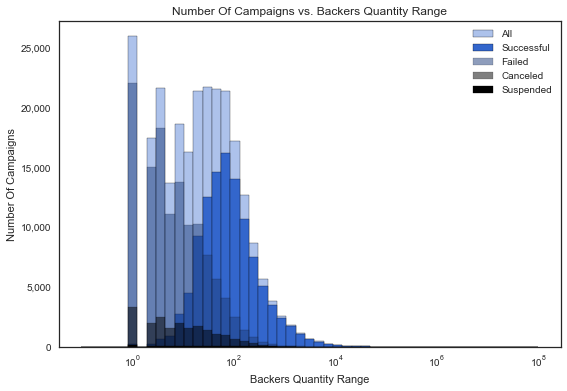

In [24]:
plt.figure(figsize=figsize)

data_all = df["backers"].tolist()
pl.hist(data_all, bins=np.logspace(np.log10(0.1),np.log10(100_000_000), 50),\
        color=single_color, edgecolor=edgecolor)

data_successful = df[df["outcome"]=="successful"]["backers"].tolist()
pl.hist(data_successful, bins=np.logspace(np.log10(0.1),np.log10(100_000_000), 50),\
        color=colors[1], edgecolor=edgecolor)

data_failed = df[df["outcome"]=="failed"]["backers"].tolist()
pl.hist(data_failed, bins=np.logspace(np.log10(0.1),np.log10(100_000_000), 50),\
        color=colors[2], alpha=0.5, edgecolor=edgecolor)

data_canceled = df[df["outcome"]=="canceled"]["backers"].tolist()
pl.hist(data_canceled, bins=np.logspace(np.log10(0.1),np.log10(100_000_000), 50),\
        color=colors[3], alpha=0.5, edgecolor=edgecolor)

data_suspended = df[df["outcome"]=="suspended"]["backers"].tolist()
pl.hist(data_suspended, bins=np.logspace(np.log10(0.1),np.log10(100_000_000), 50),\
        color=colors[3], edgecolor=edgecolor)

plt.legend(["All", "Successful", "Failed", "Canceled", "Suspended"])

pl.gca().set_xscale("log")

ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.title("Number Of Campaigns vs. Backers Quantity Range")
plt.xlabel("Backers Quantity Range")
plt.ylabel("Number Of Campaigns")

pl.show()

# Number Of Campaigns vs. Pledged/ Goal Range

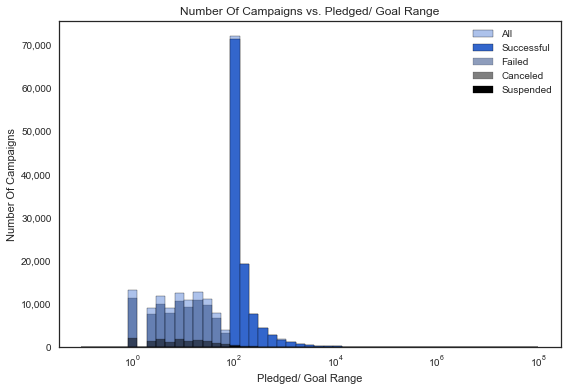

In [25]:
x = "pledged_to_goal"
plt.figure(figsize=figsize)

data_all = df[x].tolist()
pl.hist(data_all, bins=np.logspace(np.log10(0.1),np.log10(100_000_000), 50),\
        color=single_color, edgecolor=edgecolor)

data_successful = df[df["outcome"]=="successful"][x].tolist()
pl.hist(data_successful, bins=np.logspace(np.log10(0.1),np.log10(100_000_000), 50),\
        color=colors[1], edgecolor=edgecolor)

data_failed = df[df["outcome"]=="failed"][x].tolist()
pl.hist(data_failed, bins=np.logspace(np.log10(0.1),np.log10(100_000_000), 50),\
        color=colors[2], alpha=0.5, edgecolor=edgecolor)

data_canceled = df[df["outcome"]=="canceled"][x].tolist()
pl.hist(data_canceled, bins=np.logspace(np.log10(0.1),np.log10(100_000_000), 50),\
        color=colors[3], alpha=0.5, edgecolor=edgecolor)

data_suspended = df[df["outcome"]=="suspended"][x].tolist()
pl.hist(data_suspended, bins=np.logspace(np.log10(0.1),np.log10(100_000_000), 50),\
        color=colors[3], edgecolor=edgecolor)

plt.legend(["All", "Successful", "Failed", "Canceled", "Suspended"])

pl.gca().set_xscale("log")

ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.title("Number Of Campaigns vs. Pledged/ Goal Range")
plt.xlabel("Pledged/ Goal Range")
plt.ylabel("Number Of Campaigns")

pl.show()

# Number Of Campaigns vs. Duration Range

/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/axes/_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


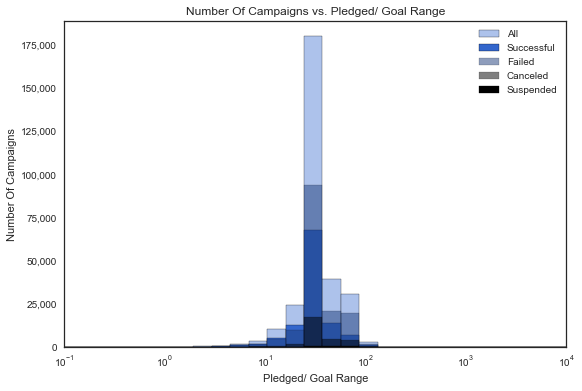

In [26]:
x = "duration"
plt.figure(figsize=figsize)

data_all = df[x].tolist()
pl.hist(data_all, bins=np.logspace(np.log10(0.1),np.log10(100_000_000), 50),\
        color=single_color, edgecolor=edgecolor)

data_successful = df[df["outcome"]=="successful"][x].tolist()
pl.hist(data_successful, bins=np.logspace(np.log10(0.1),np.log10(100_000_000), 50),\
        color=colors[1], edgecolor=edgecolor)

data_failed = df[df["outcome"]=="failed"][x].tolist()
pl.hist(data_failed, bins=np.logspace(np.log10(0.1),np.log10(100_000_000), 50),\
        color=colors[2], alpha=0.5, edgecolor=edgecolor)

data_canceled = df[df["outcome"]=="canceled"][x].tolist()
pl.hist(data_canceled, bins=np.logspace(np.log10(0.1),np.log10(100_000_000), 50),\
        color=colors[3], alpha=0.5, edgecolor=edgecolor)

data_suspended = df[df["outcome"]=="suspended"][x].tolist()
pl.hist(data_suspended, bins=np.logspace(np.log10(0.1),np.log10(100_000_000), 50),\
        color=colors[3], edgecolor=edgecolor)

plt.legend(["All", "Successful", "Failed", "Canceled", "Suspended"])

pl.gca().set_xscale("log")

ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.title("Number Of Campaigns vs. Pledged/ Goal Range")
plt.xlabel("Pledged/ Goal Range")
plt.ylabel("Number Of Campaigns")

plt.xlim(0, 10_000)

pl.show()

# Pledged Amount vs. Goal Amount

(0, 100000000)

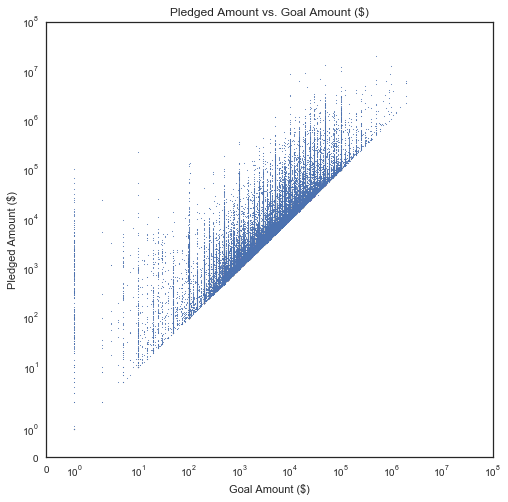

In [27]:
label="Goal Amount ($)"
df[df["outcome"]=="successful"].plot(kind="scatter", x="goal", y="pledged", figsize=(8,8), s=0.5)

ax = plt.gca()
ax.set_xscale('symlog')
ax.set_yscale('symlog')

plt.title(f"Pledged Amount vs. {label}")
plt.xlabel(label)
plt.ylabel("Pledged Amount ($)")

plt.xlim(0, 100_000_000)
plt.ylim(0, 100_000_000)

# Pledged Amount vs. Backers

(0, 100000000)

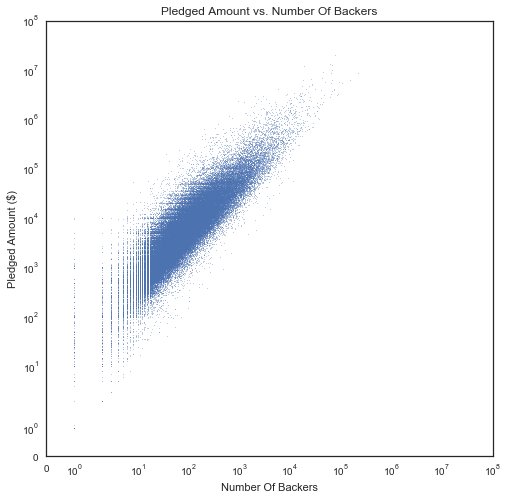

In [28]:
label="Number Of Backers"
df[df["outcome"]=="successful"].plot(kind="scatter", x="backers", y="pledged", figsize=(8,8), s=0.1)

ax = plt.gca()
ax.set_xscale('symlog')
ax.set_yscale('symlog')

plt.title(f"Pledged Amount vs. {label}")
plt.xlabel(label)
plt.ylabel("Pledged Amount ($)")

plt.xlim(0, 100_000_000)
plt.ylim(0, 100_000_000)

# Pledged Amount vs. Duration

(0, 100000000)

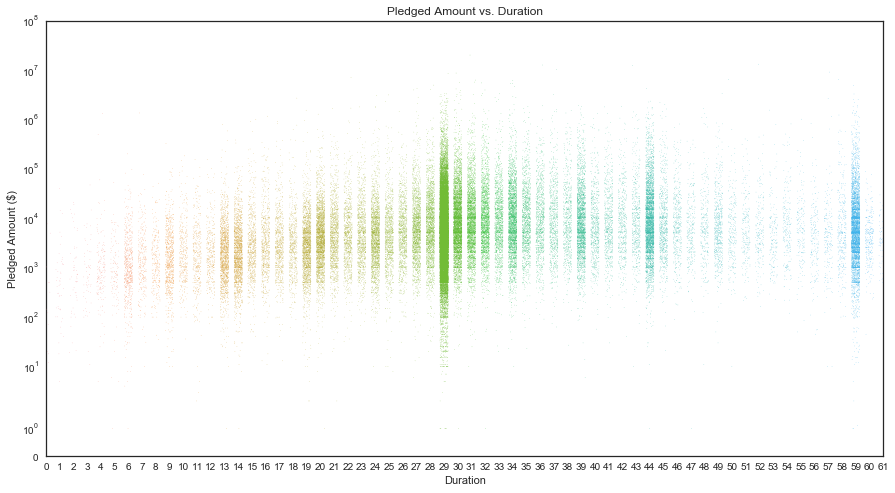

In [29]:
label="Duration"

plt.figure(figsize=big_figsize)
sns.stripplot(df[df["outcome"]=="successful"]["duration"].tolist(),\
              df[df["outcome"]=="successful"]["pledged"].tolist(),\
              jitter=0.3, size=0.5)

ax = plt.gca()
ax.set_yscale('symlog')

plt.title(f"Pledged Amount vs. {label}")
plt.xlabel(label)
plt.ylabel("Pledged Amount ($)")

plt.xlim(0, 61)
plt.ylim(0, 100_000_000)

# Pledged Amount vs. Category

(0, 100000000)

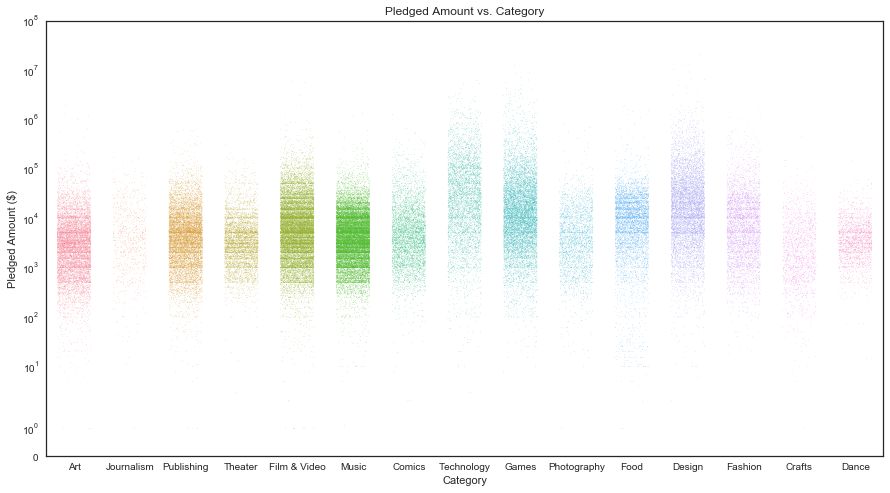

In [30]:
label="Category"

plt.figure(figsize=big_figsize)
sns.stripplot(df[df["outcome"]=="successful"]["main_category"].tolist(),\
              df[df["outcome"]=="successful"]["pledged"].tolist(),\
              jitter=0.3, size=0.5)

ax = plt.gca()
ax.set_yscale('symlog')

plt.title(f"Pledged Amount vs. {label}")
plt.xlabel(label)
plt.ylabel("Pledged Amount ($)")

plt.ylim(0, 100_000_000)

# Pledged Amount vs. Year

(0, 100000000)

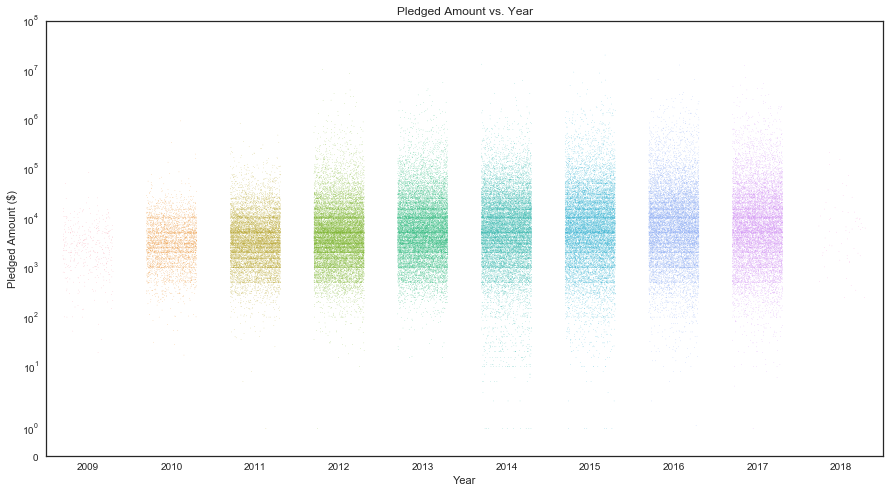

In [31]:
label="Year"

plt.figure(figsize=big_figsize)

sns.stripplot(df[df["outcome"]=="successful"]["end_year"].tolist(),\
              df[df["outcome"]=="successful"]["pledged"].tolist(),\
              jitter=0.3, size=0.5)

ax = plt.gca()
ax.set_yscale('symlog')

plt.title(f"Pledged Amount vs. {label}")
plt.xlabel(label)
plt.ylabel("Pledged Amount ($)")

plt.ylim(0, 100_000_000)

# Pledged Amount vs. Quarter

(0, 100000000)

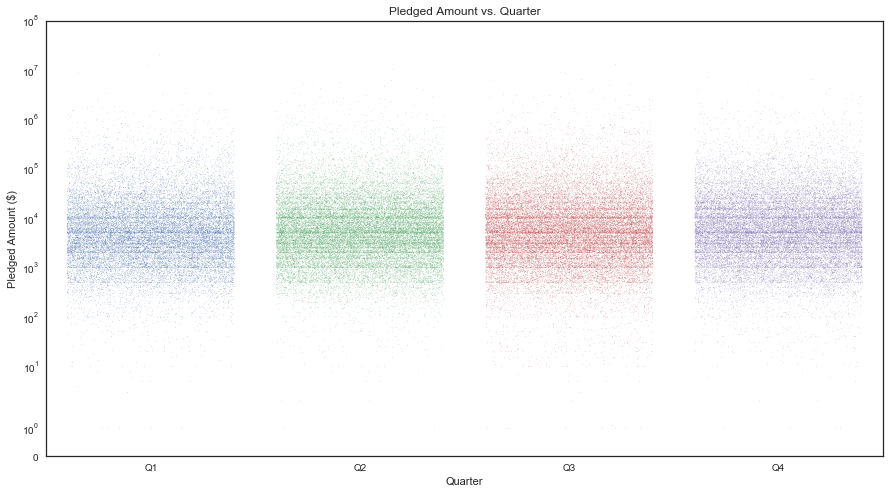

In [32]:
label="Quarter"

plt.figure(figsize=big_figsize)

data = df[df["outcome"]=="successful"].sort_values("end_quarter")

sns.stripplot(data["end_quarter"].tolist(), data["pledged"].tolist(),\
              jitter=0.4, size=0.5)

ax = plt.gca()
ax.set_yscale('symlog')

plt.title(f"Pledged Amount vs. {label}")
plt.xlabel(label)
plt.ylabel("Pledged Amount ($)")

plt.ylim(0, 100_000_000)

# Pledged Amount vs. Month

(0, 100000000)

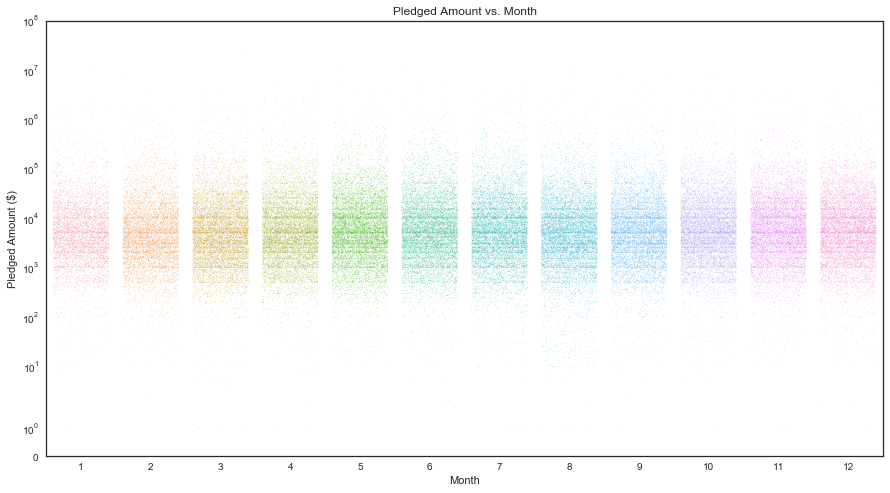

In [33]:
label="Month"

plt.figure(figsize=big_figsize)

sns.stripplot(df[df["outcome"]=="successful"]["end_month"].tolist(),\
              df[df["outcome"]=="successful"]["pledged"].tolist(),
              jitter=0.4, size=0.5)

ax = plt.gca()
ax.set_yscale('symlog')

plt.title(f"Pledged Amount vs. {label}")
plt.xlabel(label)
plt.ylabel("Pledged Amount ($)")

plt.ylim(0, 100_000_000)

# Pledged Amount vs. Date

(0, 100000000)

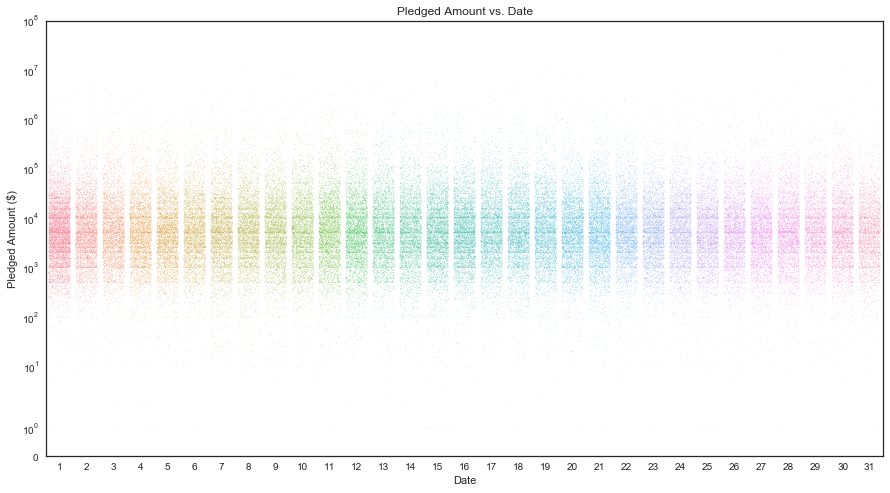

In [34]:
label="Date"

plt.figure(figsize=big_figsize)

sns.stripplot(df[df["outcome"]=="successful"]["end_date"].tolist(),\
              df[df["outcome"]=="successful"]["pledged"].tolist(),\
              jitter=0.4, size=0.5)

ax = plt.gca()
ax.set_yscale('symlog')

plt.title(f"Pledged Amount vs. {label}")
plt.xlabel(label)
plt.ylabel("Pledged Amount ($)")

plt.ylim(0, 100_000_000)

# Pledged Amount vs. Day Of Week

(0, 100000000)

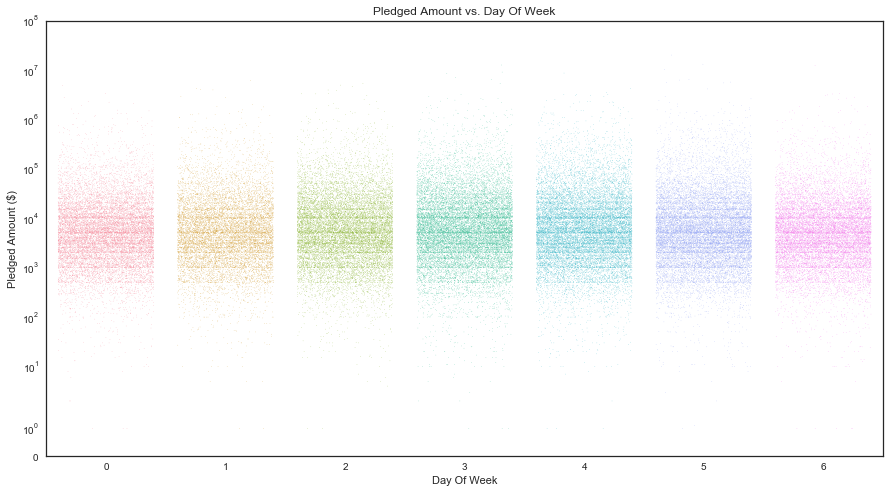

In [35]:
label="Day Of Week"

plt.figure(figsize=big_figsize)

sns.stripplot(df[df["outcome"]=="successful"]["end_day"].tolist(),\
              df[df["outcome"]=="successful"]["pledged"].tolist(),\
              jitter=0.4, size=0.5)

ax = plt.gca()
ax.set_yscale('symlog')

plt.title(f"Pledged Amount vs. {label}")
plt.xlabel(label)
plt.ylabel("Pledged Amount ($)")

plt.ylim(0, 100_000_000)

# Pledged Amount vs. Time

(0, 100000000)

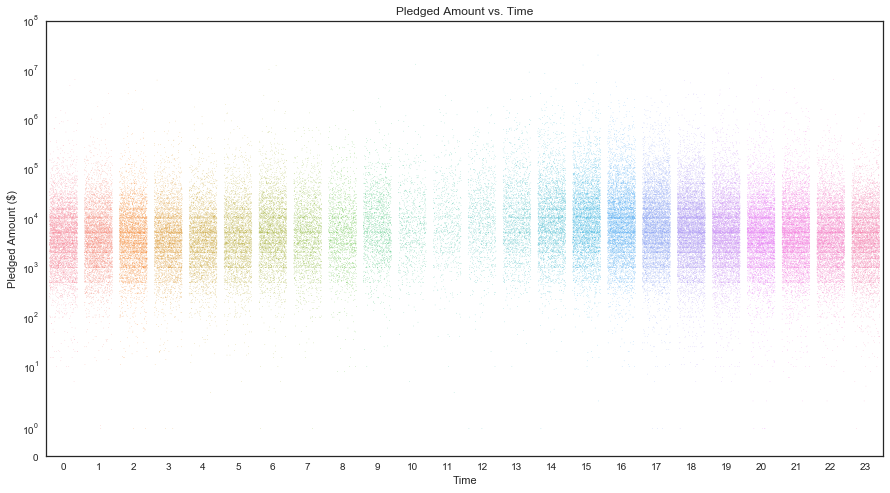

In [36]:
label="Time"

plt.figure(figsize=big_figsize)

sns.stripplot(df[df["outcome"]=="successful"]["launch_time"].tolist(),\
              df[df["outcome"]=="successful"]["pledged"].tolist(),\
              jitter=0.4, size=0.5)

ax = plt.gca()
ax.set_yscale('symlog')

plt.title(f"Pledged Amount vs. {label}")
plt.xlabel(label)
plt.ylabel("Pledged Amount ($)")

plt.ylim(0, 100_000_000)

# Backers vs. Categories

(0, 100000000)

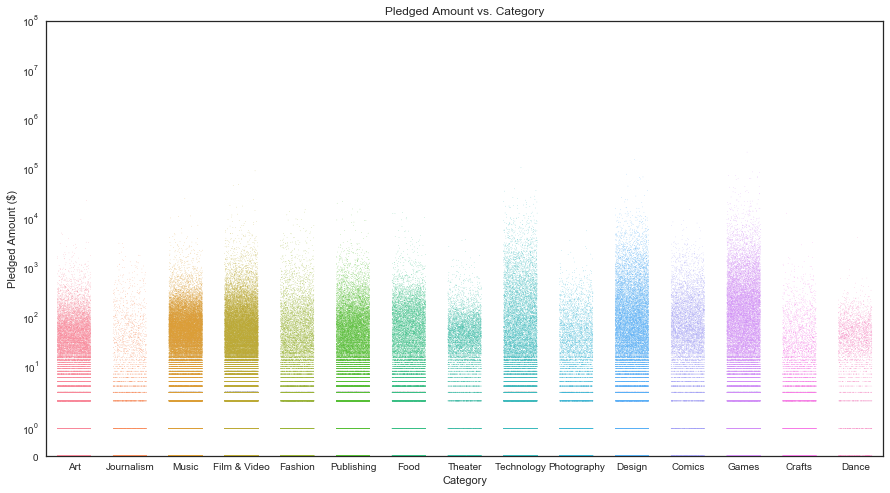

In [37]:
label="Category"

plt.figure(figsize=big_figsize)
sns.stripplot(df["main_category"].tolist(),\
              df["backers"].tolist(),\
              jitter=0.3, size=0.5)

ax = plt.gca()
ax.set_yscale('symlog')

plt.title(f"Pledged Amount vs. {label}")
plt.xlabel(label)
plt.ylabel("Pledged Amount ($)")

plt.ylim(0, 100_000_000)

# Correlations

In [38]:
numeric_columns = ['backers', 'goal', 'duration', 'launch_year', 'launch_month', 'launch_date', 'end_date', 'end_day']
corr_index = []
corr_list = []

for i in list(df[numeric_columns]):
    corr = df[i].corr(df["pledged"])
    corr_index.append(i)
    corr_list.append(corr)

corr_df = pd.DataFrame({"corr":corr_list}, index=corr_index)
corr_df.sort_values("corr", ascending=False)

,corr
backers,0.754823
launch_year,0.027897
goal,0.006060
end_day,0.002746
end_date,0.001530
duration,0.000806
launch_date,0.000345
launch_month,-0.001381


In [39]:
df["goal"].corr(df["pledged"])
df["backers"].corr(df["pledged"])
df["duration"].corr(df["pledged"])

0.0008062770053050585

The correlation between number of backers and pledged amount is the greatest (r=0.754), showing a strong positive linear relationship between the two.
There is little or not linear relationship between goal amount and pledged amount (r=0.006), nor between duration and pledged amount (r=-0.0008)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


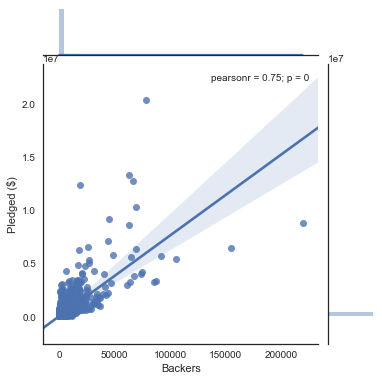

In [40]:
ax = sns.jointplot("backers", "pledged", data=df, kind="reg")
import matplotlib.pyplot as plt
plt.xlabel("Backers")
plt.ylabel("Pledged ($)")
sns.set(rc={'figure.figsize':figsize})
framon = True

The p value = 0 here shows a significant relationship between the quantity of backers and the amount pledged.

# Number Of Campaigns vs. Launch Time

In [41]:
def makeplot(x, label):
    columns_6 = ["total", "successful", "canceled", "live", "suspended", "failed"]
    colors_6 = ["green", "#adc2eb", "#3366cc", "#1f3d7a", "#000000", "#7094db"]
    labels_6 = columns_6
    
    data = pd.DataFrame(df.groupby([x, "outcome"])["name"].count())
    data = data.reset_index()
    data = data.pivot(index=x, columns="outcome", values="name")
    # Fill nan values in Nan columns with 0:
    data = data.fillna(value=0)
    data["total"] = data["successful"] + data["canceled"] + data["live"] + data["suspended"] + data["failed"]
    data = data[columns_6]
    
    print(data.head())
    
    data.plot(kind="line", marker="o", markersize=markersize*1.5,
              linewidth=linewidth, figsize=figsize, color=colors_6)

    ax = plt.gca()
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    ax.set_title(f"Number Of Campaigns vs. {label}")
    ax.set_xlabel(label)
    ax.set_ylabel("Number Of Campaigns")

    plt.legend(labels=labels_6, loc='lower center', bbox_to_anchor=bbox_to_anchor, ncol=6, fancybox=True, shadow=True)

outcome      total  successful  canceled  live  suspended  failed
launch_time                                                      
0            17733        6037      1764    92         73    9767
1            16097        5607      1582    85         61    8762
2            14456        5064      1332    89         68    7903
3            12909        4484      1210    69         44    7102
4            11462        4060      1064    53         49    6236


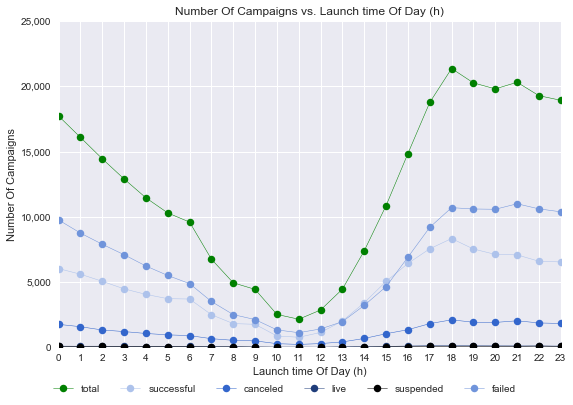

In [42]:
x = "launch_time"
label = "Launch time Of Day (h)"

makeplot(x, label)

plt.xlim(0,23)
plt.ylim(0,25_000)
plt.xticks(range(24))

plt.show()

# Number Of Campaigns vs. End Year

outcome     total  successful  canceled  live  suspended   failed
end_year                                                         
2009        902.0       384.0     108.0   0.0        0.0    410.0
2010       9098.0      4008.0     785.0   0.0        8.0   4297.0
2011      25107.0     11768.0    2086.0   0.0       52.0  11201.0
2012      41197.0     17956.0    2649.0   0.0       51.0  20541.0
2013      38424.0     17133.0    2969.0   0.0       54.0  18268.0


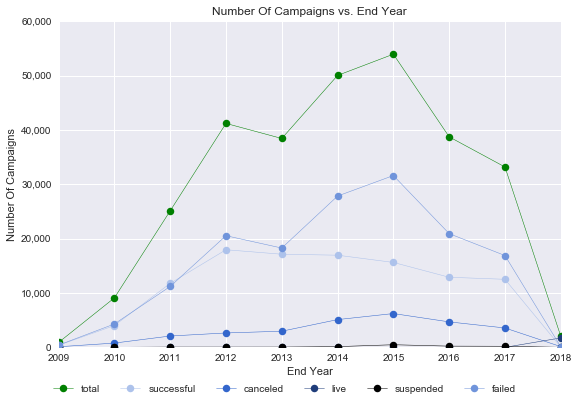

In [43]:
x = "end_year"
label = "End Year"

makeplot(x, label)

plt.xlim(2009, 2018)
plt.ylim(0, 60_000)

plt.show()

# Number Of Campaigns vs. End Quarter

outcome      total  successful  canceled  live  suspended  failed
end_quarter                                                      
Q1           62505       22688      5849  1737        302   31929
Q2           77125       30058      7351     1        311   39404
Q3           79961       28633      7896     1        306   43125
Q4           73036       27920      7215     1        297   37603


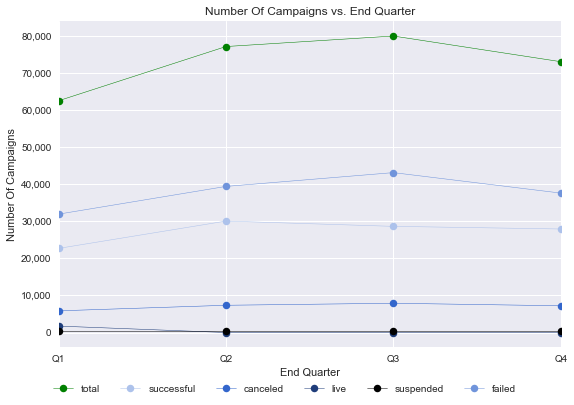

In [44]:
x = "end_quarter"
label = "End Quarter"

makeplot(x, label)

plt.xlim(0, 3)
#plt.ylim(0, 80_000)
ax = plt.gca()
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(["Q1", "Q2", "Q3", "Q4"])

plt.show()

# Number Of Campaigns vs. End Month

outcome      total  successful  canceled    live  suspended   failed
end_month                                                           
1          18293.0      5856.0    1702.0  1451.0       84.0   9200.0
2          18961.0      6887.0    1752.0   278.0      101.0   9943.0
3          25251.0      9945.0    2395.0     8.0      117.0  12786.0
4          25469.0     10111.0    2405.0     1.0      111.0  12841.0
5          26504.0     10320.0    2534.0     0.0       92.0  13558.0


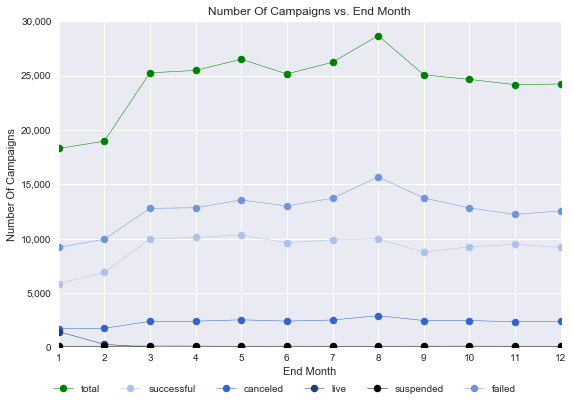

In [45]:
x = "end_month"
label = "End Month"

makeplot(x, label)

plt.xlim(1,12)
plt.ylim(0, 30_000)

plt.xticks(range(1,13))

plt.show()

# Number Of Campaigns vs. Date

outcome   total  successful  canceled  live  suspended  failed
end_date                                                      
1         17045        7028      1535    57         53    8372
2         10780        4361      1045    52         34    5288
3          9257        3486       876    75         40    4780
4          9285        3371       901    87         24    4902
5          9566        3601       939    84         37    4905


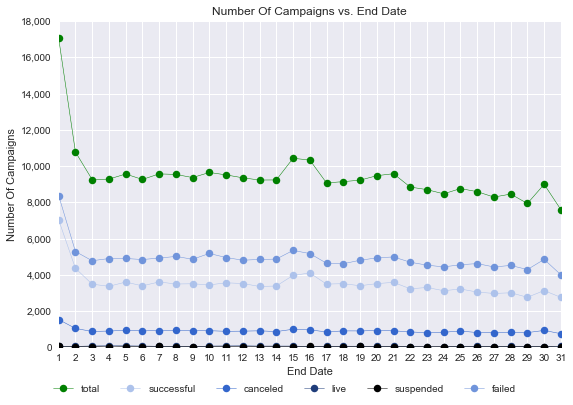

In [46]:
x = "end_date"
label = "End Date"

makeplot(x, label)

plt.xlim(1,30)
plt.ylim(0, 18_000)

plt.xticks(range(1,32))

plt.show()

# Number Of Campaigns vs. End Day Of Week

outcome  total  successful  canceled  live  suspended  failed
end_day                                                      
0        38491       14755      3789   232        168   19547
1        30421       11759      3027   168        141   15326
2        40703       15259      3939   274        157   21074
3        46197       17609      4470   288        187   23643
4        47400       17563      4581   278        208   24770


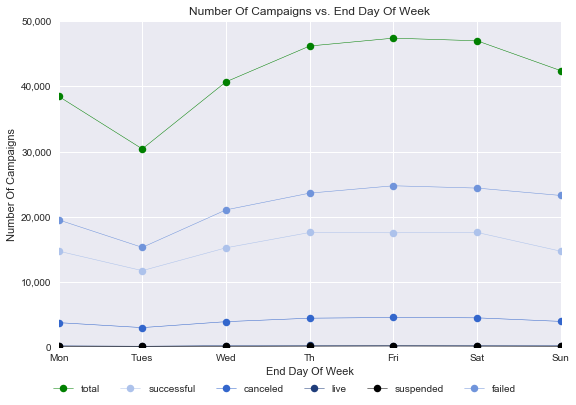

In [47]:
x = "end_day"
label = "End Day Of Week"

makeplot(x, label)

plt.xlim(0,6)
plt.ylim(0, 50_000)

ax = plt.gca()
ax.set_xticklabels(["Mon", "Tues", "Wed", "Th", "Fri", "Sat", "Sun"])

plt.show()

# Number Of Campaigns vs. End Date(Full)

outcome     total  successful  canceled  live  suspended  failed
end                                                             
2009-05-03    1.0         1.0       0.0   0.0        0.0     0.0
2009-05-16    2.0         1.0       0.0   0.0        0.0     1.0
2009-05-20    1.0         0.0       0.0   0.0        0.0     1.0
2009-05-22    1.0         0.0       0.0   0.0        0.0     1.0
2009-05-26    1.0         0.0       0.0   0.0        0.0     1.0


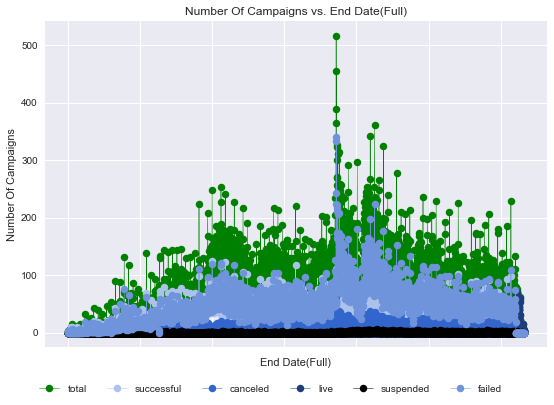

9310    The date with most campaigns was: 2010-12-13
Name: end, dtype: object


In [48]:
x = "end"
label = "End Date(Full)"

makeplot(x, label)

plt.show()
data["name"].max()
date_with_most_campaigns = data[data["name"]==data["name"].max()]["end"]
print("The date with most campaigns was: " + date_with_most_campaigns)

# Outcomes Of Each Main Category

In [49]:
main_category_list = df["main_category"].value_counts()
main_category_list
len(main_category_list)

15

In [50]:
data = df.groupby(["main_category", "outcome"]).count().reset_index()
data.head()

,main_category,outcome,name,sub_category,end,backers,pledged,goal,duration,launch_year,...,launch_date,launch_day,launch_time,end_year,end_month,end_date,end_day,pledged_to_goal,end_quarter,am_pm
0,Art,canceled,1667,1667,1667,1667,1667,1667,1667,1667,...,1667,1667,1667,1667,1667,1667,1667,1667,1667,1667
1,Art,failed,10953,10953,10953,10953,10953,10953,10953,10953,...,10953,10953,10953,10953,10953,10953,10953,10953,10953,10953
2,Art,live,124,124,124,124,124,124,124,124,...,124,124,124,124,124,124,124,124,124,124
3,Art,successful,9496,9496,9496,9496,9496,9496,9496,9496,...,9496,9496,9496,9496,9496,9496,9496,9496,9496,9496
4,Art,suspended,71,71,71,71,71,71,71,71,...,71,71,71,71,71,71,71,71,71,71


In [51]:
data = data[["main_category", "outcome", "name"]]
data.head()

,main_category,outcome,name
0,Art,canceled,1667
1,Art,failed,10953
2,Art,live,124
3,Art,successful,9496
4,Art,suspended,71


In [52]:
columns = ["successful", "canceled", "live", "suspended", "failed"]
pivot_df = data.pivot(index="main_category", columns="outcome", values="name")
pivot_df = pivot_df.fillna(value=0)
pivot_df = pivot_df[columns]
pivot_df["total"] = pivot_df["successful"] + pivot_df["live"] + pivot_df["canceled"] + pivot_df["suspended"] + pivot_df["failed"]
pivot_df = pivot_df.sort_values("total", ascending=False)
pivot_df.head()

outcome,successful,canceled,live,suspended,failed,total
main_category,,,,,,
Film & Video,19782,4693,212,84,27151,51922
Music,21718,2706,194,113,18507,43238
Publishing,9965,2805,198,46,18712,31726
Games,9356,4099,165,143,10873,24636
Art,9496,1667,124,71,10953,22311


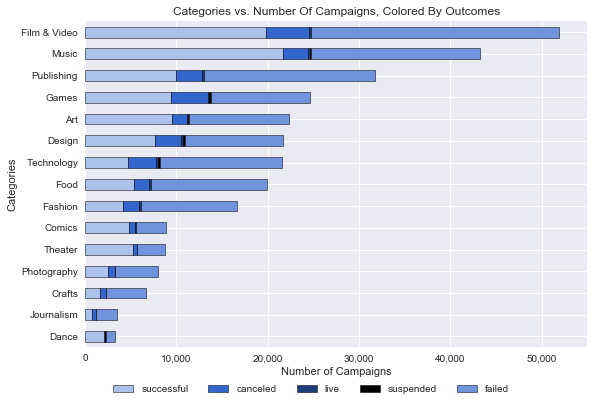

In [53]:
pivot_df.loc[:,columns].plot.barh(stacked=True, color=colors, alpha=1, edgecolor=edgecolor, linewidth=linewidth, figsize=figsize)
plt.title("Categories vs. Number Of Campaigns, Colored By Outcomes")
plt.xlabel("Number of Campaigns")
plt.ylabel("Categories")
plt.legend(loc='lower center', bbox_to_anchor=bbox_to_anchor, ncol=ncol, fancybox=True, shadow=True)
plt.gca().invert_yaxis()
plt.xlim(0, 55000)
frameon = True
ax = plt.gca()
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

* The top 5 categories with the most campaigns were: film & video, music, publishing, games, and art.
* Although film & video had more campaigns than music, music turned out to yield a few more successful campaigns than film & video.
* Both film & video and music doubled in successful campaigns than that of publishing, games and art.

In [54]:
columns = ["successful", "canceled", "live", "suspended", "failed"]
new_columns = ["successful_percent", "canceled_percent", "live_percent", "suspended_percent", "failed_percent"]
for i in range(len(columns)):
    pivot_df[new_columns[i]] = pivot_df[columns[i]] / pivot_df["total"] * 100
    pivot_df[new_columns[i]] = pd.to_numeric(pivot_df[new_columns[i]])
pivot_df.head()

outcome,successful,canceled,live,suspended,failed,total,successful_percent,canceled_percent,live_percent,suspended_percent,failed_percent
main_category,,,,,,,,,,,
Film & Video,19782,4693,212,84,27151,51922,38.099457,9.038558,0.408305,0.161781,52.291899
Music,21718,2706,194,113,18507,43238,50.228965,6.258384,0.448679,0.261344,42.802627
Publishing,9965,2805,198,46,18712,31726,31.409569,8.841329,0.624094,0.144991,58.980016
Games,9356,4099,165,143,10873,24636,37.976944,16.638253,0.669752,0.580451,44.134600
Art,9496,1667,124,71,10953,22311,42.561965,7.471651,0.555780,0.318229,49.092376


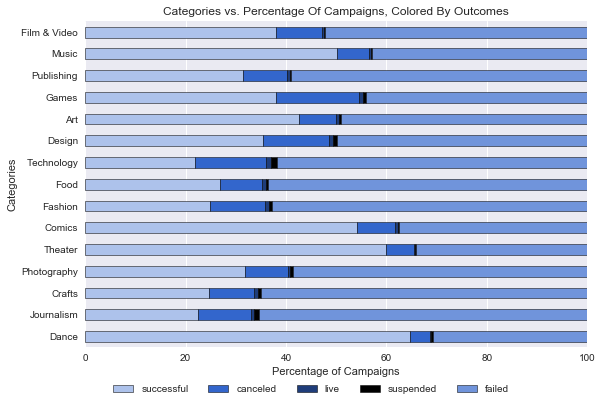

In [55]:
labels = columns
pivot_df.loc[:,new_columns].plot.barh(stacked=True, color=colors, alpha=1, edgecolor=edgecolor, linewidth=linewidth, figsize=figsize)
plt.title("Categories vs. Percentage Of Campaigns, Colored By Outcomes")
plt.xlabel("Percentage of Campaigns")
plt.ylabel("Categories")
plt.legend(labels=labels, loc='lower center', bbox_to_anchor=bbox_to_anchor, ncol=ncol, fancybox=True, shadow=True)
plt.gca().invert_yaxis()
plt.xlim(0,100)
frameon = True
ax = plt.gca()
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

* Music had the most successful rate among the top 5 categories with most campaigns.
* All 15 categories had more successful rate than failed rate, except for games, comics, theater, and dance.

In [56]:
pivot_df["live+suspended_percent"] = pivot_df["live_percent"] + pivot_df["suspended_percent"]
pivot_df.max()

outcome
successful                21718.000000
canceled                   4693.000000
live                        212.000000
suspended                   247.000000
failed                    27151.000000
total                     51922.000000
successful_percent           64.684015
canceled_percent             16.638253
live_percent                  0.937094
suspended_percent             1.145853
failed_percent               65.282486
live+suspended_percent        2.082947
dtype: float64

Among all categories, live and suspended campaigns only accounted for at most 2.08% for a each category.

# Outcomes Of Each Sub-category

In [57]:
sub_category_list = df["sub_category"].value_counts()
sub_category_list
len(sub_category_list)

159

In [58]:
data = df.groupby(["sub_category", "outcome"]).count().reset_index()
data = data[["sub_category", "outcome", "name"]]
data.head()

,sub_category,outcome,name
0,3D Printing,canceled,46
1,3D Printing,failed,195
2,3D Printing,live,3
3,3D Printing,successful,154
4,3D Printing,suspended,9


In [59]:
columns = ["successful", "canceled", "live", "suspended", "failed"]
pivot_df = data.pivot(index="sub_category", columns="outcome", values="name")
pivot_df = pivot_df.fillna(value=0)
pivot_df = pivot_df[columns]
pivot_df["total"] = pivot_df["successful"] + pivot_df["live"] + pivot_df["canceled"]\
+ pivot_df["suspended"] + pivot_df["failed"]
pivot_df = pivot_df.sort_values("total", ascending=False)
pivot_df.head()

outcome,successful,canceled,live,suspended,failed,total
sub_category,,,,,,
Product Design,5838.0,2224.0,132.0,134.0,7894.0,16222.0
Documentary,5164.0,1278.0,32.0,12.0,7185.0,13671.0
Music,5749.0,573.0,55.0,41.0,5177.0,11595.0
Tabletop Games,5981.0,1668.0,66.0,18.0,2958.0,10691.0
Shorts,5559.0,787.0,21.0,6.0,3975.0,10348.0


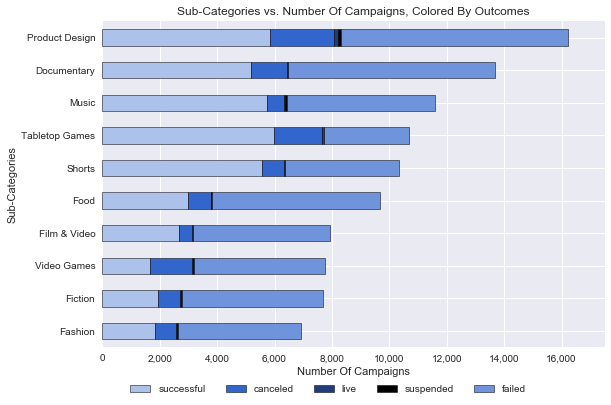

In [60]:
pivot_df_top10 = pivot_df.head(10)
pivot_df_top10.loc[:,columns].plot.barh(stacked=True, color=colors, alpha=1, edgecolor=edgecolor, linewidth=linewidth, figsize=figsize)
plt.title("Sub-Categories vs. Number Of Campaigns, Colored By Outcomes")
plt.xlabel("Number Of Campaigns")
plt.ylabel("Sub-Categories")
plt.legend(loc='lower center', bbox_to_anchor=bbox_to_anchor, ncol=ncol, fancybox=True, shadow=True)
plt.gca().invert_yaxis()
plt.xlim(0, 17500)
frameon = True
ax = plt.gca()
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

* The top 5 sub-categories with the most campaigns were: product design, documentary, music, tabletop games, and shorts.
* 3 of the top 10 sub-categories with the most campaigns, documentary, shorts and film & video, were under the main category of film & video.
* Number of successes among all the top 5 sub-categories with the most successes were actually quite similar, despite the differences in the number of total campaigns for each.

In [61]:
columns = ["successful", "canceled", "live", "suspended", "failed"]
new_columns = ["successful_percent", "canceled_percent", "live_percent", "suspended_percent", "failed_percent"]
for i in range(len(columns)):
    pivot_df[new_columns[i]] = pivot_df[columns[i]] / pivot_df["total"] * 100
pivot_df.head()

outcome,successful,canceled,live,suspended,failed,total,successful_percent,canceled_percent,live_percent,suspended_percent,failed_percent
sub_category,,,,,,,,,,,
Product Design,5838.0,2224.0,132.0,134.0,7894.0,16222.0,35.988164,13.709777,0.813710,0.826039,48.662310
Documentary,5164.0,1278.0,32.0,12.0,7185.0,13671.0,37.773389,9.348255,0.234072,0.087777,52.556506
Music,5749.0,573.0,55.0,41.0,5177.0,11595.0,49.581716,4.941785,0.474342,0.353601,44.648555
Tabletop Games,5981.0,1668.0,66.0,18.0,2958.0,10691.0,55.944252,15.601908,0.617342,0.168366,27.668132
Shorts,5559.0,787.0,21.0,6.0,3975.0,10348.0,53.720526,7.605334,0.202938,0.057982,38.413220


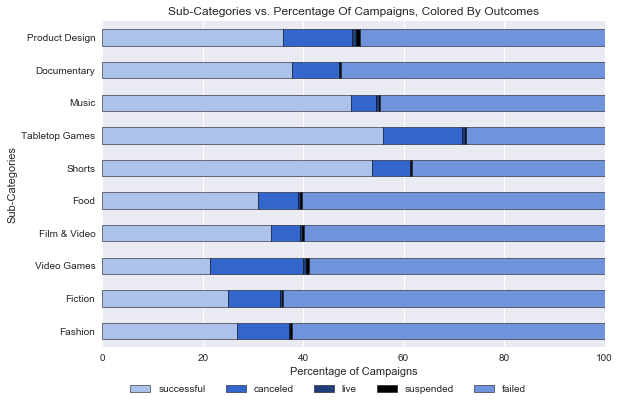

In [62]:
pivot_df_top10 = pivot_df.head(10)
labels = columns
pivot_df_top10.loc[:,new_columns].plot.barh(stacked=True, color=colors, alpha=1, edgecolor=edgecolor, linewidth=linewidth, figsize=figsize)
plt.title("Sub-Categories vs. Percentage Of Campaigns, Colored By Outcomes")
plt.xlabel("Percentage of Campaigns")
plt.ylabel("Sub-Categories")
plt.legend(labels=labels, loc='lower center', bbox_to_anchor=bbox_to_anchor, ncol=ncol, fancybox=True, shadow=True)
plt.gca().invert_yaxis()
plt.xlim(0,100)
frameon = True
ax = plt.gca()
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

* Among the top 5 subcategories with the most campaigns, tabletop games had the greates successful rate and the smallest failed rate.
* Music, tabletop games and shorts had a greater successful rate than failed rate, whereas all others in the top 10 subcategories with the most campaigns had a smaller successful rate than failed rate.